# Patos

In [2]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\Patos\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_patos1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_patos1['data'] = pd.to_datetime(df_patos1['data'], errors='coerce')
df_patos1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_patos1 = df_patos1[[col for col in colunas_final if col in df_patos1.columns]]

# Exibe amostra
print(df_patos1.head(10))


           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
4018 2007-07-21      20.0      31.8  26.333333         36.0         82.0   
4019 2007-07-22      22.6      27.6  24.883333         49.0         93.0   
4020 2007-07-23      22.5      30.1  25.441667         44.0         88.0   
4021 2007-07-24      20.1      33.3  26.508333         28.0         92.0   
4022 2007-07-25      21.2      32.4  26.820833         31.0         79.0   
4023 2007-07-26      21.5      34.1  27.350000         30.0         84.0   
4024 2007-07-27      22.9      32.3  26.912500         33.0         78.0   
4025 2007-07-28      20.9      32.7  26.473913         29.0         66.0   
4026 2007-07-29      21.1      33.1  26.720833         29.0         77.0   
4027 2007-07-30      21.6      33.9  27.291667         18.0         69.0   

      umidade_mean  pressao_min  pressao_max  pressao_mean  
4018     53.041667        982.8        987.0    984.912500  
4019     72.000000        981.8        98

In [3]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\Patos\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_patos2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_patos2['data'] = pd.to_datetime(df_patos2['data'], errors='coerce')
df_patos2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_patos2 = df_patos2[[col for col in colunas_final if col in df_patos2.columns]]

# Exibe amostra
print(df_patos2.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      24.0      37.4  30.437500         10.0         57.0   
1 2019-01-02      25.4      37.9  30.637500         10.0         52.0   
2 2019-01-03      23.6      36.4  29.766667         10.0         56.0   
3 2019-01-04      23.6      36.3  28.800000         11.0         70.0   
4 2019-01-05      23.0      35.6  27.958333         15.0         80.0   
5 2019-01-06      24.1      33.2  27.820833         18.0         77.0   
6 2019-01-07      24.4      34.0  28.116667         21.0         62.0   
7 2019-01-08      23.0      33.4  26.829167         23.0         84.0   
8 2019-01-09      22.2      33.8  26.879167         22.0         89.0   
9 2019-01-10      23.4      34.0  28.300000         14.0         61.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     34.619048        980.5        985.5    982.979167  
1     32.761905        981.0        985.5    983.716667  
2     29.708333       

In [4]:
# Junta os dois datasets
df_patos = pd.concat([df_patos1, df_patos2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_patos['data'] = pd.to_datetime(df_patos['data'], errors='coerce')

# Ordena por data
df_patos.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_patos.head())
print(df_patos.tail())


# Cria colunas de ano e m√™s
df_patos['ano'] = df_patos['data'].dt.year
df_patos['mes'] = df_patos['data'].dt.month

# Calcula a m√©dia mensal
patos_media_mensal = (
    df_patos
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
patos_media_mensal['ano_mes'] = pd.to_datetime(
    patos_media_mensal['ano'].astype(str) + '-' +
    patos_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
patos_media_mensal = patos_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(patos_media_mensal.head(12))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-07-21      20.0      31.8  26.333333         36.0         82.0   
1 2007-07-22      22.6      27.6  24.883333         49.0         93.0   
2 2007-07-23      22.5      30.1  25.441667         44.0         88.0   
3 2007-07-24      20.1      33.3  26.508333         28.0         92.0   
4 2007-07-25      21.2      32.4  26.820833         31.0         79.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     53.041667        982.8        987.0    984.912500  
1     72.000000        981.8        985.6    983.812500  
2     68.666667        981.7        985.6    983.870833  
3     58.791667        981.5        986.4    984.087500  
4     55.083333        981.5        985.9    984.029167  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6369 2024-12-27      22.2      37.4  29.470833         27.0         75.0   
6370 2024-12-28      25.7      37.0  30.973913         30.0  

# Areia


In [6]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\Areia\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_areia1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_areia1['data'] = pd.to_datetime(df_areia1['data'], errors='coerce')
df_areia1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_areia1 = df_areia1[[col for col in colunas_final if col in df_areia1.columns]]

# Exibe amostra
print(df_areia1.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-01-01      20.5      28.5  23.637500         57.0        100.0   
1 2007-01-02      21.2      26.3  22.891667         68.0        100.0   
2 2007-01-03      19.9      28.0  22.779167         48.0        100.0   
3 2007-01-04      19.7      27.1  22.495833         68.0        100.0   
4 2007-01-05      20.8      27.6  23.287500         58.0        100.0   
5 2007-01-06      20.5      27.0  22.858333         66.0        100.0   
6 2007-01-07      19.9      28.1  23.233333         57.0        100.0   
7 2007-01-08      20.9      26.9  23.000000         58.0        100.0   
8 2007-01-09      20.8      27.8  23.408333         65.0        100.0   
9 2007-01-10      20.7      28.4  23.541667         56.0        100.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     82.750000        946.8        950.2    948.587500  
1     88.173913        947.6        950.5    949.029167  
2     74.153846       

In [7]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\Areia\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_areia2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_areia2['data'] = pd.to_datetime(df_areia2['data'], errors='coerce')
df_areia2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_areia2 = df_areia2[[col for col in colunas_final if col in df_areia2.columns]]

# Exibe amostra
print(df_areia2.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      21.4      30.0  24.550000         49.0         94.0   
1 2019-01-02      21.6      30.3  24.700000         43.0         94.0   
2 2019-01-03      20.7      30.2  24.329167         44.0         94.0   
3 2019-01-04      20.6      30.3  24.287500         46.0         95.0   
4 2019-01-05      21.6      28.9  24.125000         52.0         93.0   
5 2019-01-06      21.2      28.6  24.016667         48.0         95.0   
6 2019-01-07      20.7      28.4  23.370833         56.0         94.0   
7 2019-01-08      20.5      27.8  23.062500         57.0         95.0   
8 2019-01-09      20.6      27.3  22.979167         57.0         96.0   
9 2019-01-10      20.7      29.7  24.000000         40.0         95.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     77.125000        947.8        951.0    949.225000  
1     73.250000        948.6        951.4    950.012500  
2     74.125000       

In [8]:
# Junta os dois datasets
df_areia = pd.concat([df_areia1, df_areia2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_areia['data'] = pd.to_datetime(df_areia['data'], errors='coerce')

# Ordena por data
df_areia.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_areia.head())
print(df_areia.tail())


# Cria colunas de ano e m√™s
df_areia['ano'] = df_areia['data'].dt.year
df_areia['mes'] = df_areia['data'].dt.month

# Calcula a m√©dia mensal
areia_media_mensal = (
    df_areia
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
areia_media_mensal['ano_mes'] = pd.to_datetime(
    areia_media_mensal['ano'].astype(str) + '-' +
    areia_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
areia_media_mensal = areia_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(areia_media_mensal.head(12))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-01-01      20.5      28.5  23.637500         57.0        100.0   
1 2007-01-02      21.2      26.3  22.891667         68.0        100.0   
2 2007-01-03      19.9      28.0  22.779167         48.0        100.0   
3 2007-01-04      19.7      27.1  22.495833         68.0        100.0   
4 2007-01-05      20.8      27.6  23.287500         58.0        100.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     82.750000        946.8        950.2    948.587500  
1     88.173913        947.6        950.5    949.029167  
2     74.153846        946.9        950.0    948.491667  
3     85.000000        946.5        949.2    947.816667  
4     81.529412        945.6        948.8    947.270833  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6570 2024-12-27      20.2      28.7  23.579167         54.0         95.0   
6571 2024-12-28      21.3      28.8  23.766667         57.0  

# Jo√£o Pessoa

In [10]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\Joao Pessoa\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_jampa1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_jampa1['data'] = pd.to_datetime(df_jampa1['data'], errors='coerce')
df_jampa1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_jampa1 = df_jampa1[[col for col in colunas_final if col in df_jampa1.columns]]

# Exibe amostra
print(df_jampa1.head(10))


           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
4018 2007-07-21      24.3      26.4  25.060000         70.0         84.0   
4019 2007-07-22      21.8      26.2  23.345833         74.0         95.0   
4020 2007-07-23      21.4      27.9  24.312500         60.0         94.0   
4021 2007-07-24      21.0      28.1  24.439130         60.0         93.0   
4022 2007-07-25      21.0      28.2  25.045833         62.0         95.0   
4023 2007-07-26      22.3      27.8  24.620833         71.0         94.0   
4024 2007-07-27      22.1      27.8  24.954167         62.0         96.0   
4025 2007-07-28      20.1      27.8  23.957143         59.0         94.0   
4026 2007-07-29      21.5      27.9  24.245833         61.0         94.0   
4027 2007-07-30      21.8      27.7  24.316667         59.0         89.0   

      umidade_mean  pressao_min  pressao_max  pressao_mean  
4018     79.000000       1009.3       1010.3   1009.700000  
4019     88.666667       1007.7       101

In [11]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\Joao Pessoa\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_jampa2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_jampa2['data'] = pd.to_datetime(df_jampa2['data'], errors='coerce')
df_jampa2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_jampa2 = df_jampa2[[col for col in colunas_final if col in df_jampa2.columns]]

# Exibe amostra
print(df_jampa2.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      25.0      30.8  27.358333         60.0         88.0   
1 2019-01-02      26.2      30.4  27.762500         58.0         82.0   
2 2019-01-03      25.7      30.8  27.754167         54.0         77.0   
3 2019-01-04      25.7      31.1  27.825000         57.0         80.0   
4 2019-01-05      26.5      31.1  27.904167         60.0         79.0   
5 2019-01-06      25.5      30.9  27.700000         55.0         80.0   
6 2019-01-07      23.2      31.0  27.058333         57.0         90.0   
7 2019-01-08      26.5      31.5  28.012500         55.0         76.0   
8 2019-01-09      26.5      31.8  28.216667         53.0         79.0   
9 2019-01-10      26.2      31.9  28.166667         53.0         76.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     75.625000       1008.6       1012.1   1010.358333  
1     72.000000       1010.3       1012.5   1011.333333  
2     67.208333       

In [12]:
# Junta os dois datasets
df_jampa = pd.concat([df_jampa1, df_jampa2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_jampa['data'] = pd.to_datetime(df_jampa['data'], errors='coerce')

# Ordena por data
df_jampa.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_jampa.head())
print(df_jampa.tail())


# Cria colunas de ano e m√™s
df_jampa['ano'] = df_jampa['data'].dt.year
df_jampa['mes'] = df_jampa['data'].dt.month

# Calcula a m√©dia mensal
jampa_media_mensal = (
    df_jampa
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
jampa_media_mensal['ano_mes'] = pd.to_datetime(
    jampa_media_mensal['ano'].astype(str) + '-' +
    jampa_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
jampa_media_mensal = jampa_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(jampa_media_mensal.head(12))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-07-21      24.3      26.4  25.060000         70.0         84.0   
1 2007-07-22      21.8      26.2  23.345833         74.0         95.0   
2 2007-07-23      21.4      27.9  24.312500         60.0         94.0   
3 2007-07-24      21.0      28.1  24.439130         60.0         93.0   
4 2007-07-25      21.0      28.2  25.045833         62.0         95.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     79.000000       1009.3       1010.3   1009.700000  
1     88.666667       1007.7       1010.9   1009.229167  
2     81.666667       1007.9       1010.2   1009.187500  
3     79.739130       1009.1       1011.4   1010.021739  
4     79.083333       1008.4       1011.6   1009.966667  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6369 2024-12-27      25.0      31.4  27.842857         55.0         82.0   
6370 2024-12-28      24.9      31.5  27.754545         61.0  

# Campina Grande

In [14]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\Campina\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_campina1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_campina1['data'] = pd.to_datetime(df_campina1['data'], errors='coerce')
df_campina1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_campina1 = df_campina1[[col for col in colunas_final if col in df_campina1.columns]]

# Exibe amostra
print(df_campina1.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-01-01      24.2      31.0  27.500000         42.0         77.0   
1 2007-01-02      23.8      25.4  24.600000         75.0         84.0   
2 2007-01-03      23.6      29.7  27.033333         45.0         78.0   
3 2007-01-04      23.0      25.6  24.300000         81.0         89.0   
4 2007-01-05      24.4      28.8  26.700000         53.0         79.0   
5 2007-01-06      25.3      28.5  26.900000         61.0         75.0   
6 2007-01-07      24.9      29.4  27.466667         49.0         71.0   
7 2007-01-08      26.3      28.8  27.550000         51.0         67.0   
8 2007-01-09      24.8      30.3  27.600000         51.0         80.0   
9 2007-01-10      24.8      29.8  27.300000         48.0         79.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     61.666667        951.6        953.5    952.800000  
1     79.500000        952.8        954.0    953.400000  
2     61.000000       

In [15]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\Campina\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_campina1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_campina1['data'] = pd.to_datetime(df_campina1['data'], errors='coerce')
df_campina1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_campina1 = df_campina1[[col for col in colunas_final if col in df_campina1.columns]]

# Exibe amostra
print(df_campina1.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-01-01      24.2      31.0  27.500000         42.0         77.0   
1 2007-01-02      23.8      25.4  24.600000         75.0         84.0   
2 2007-01-03      23.6      29.7  27.033333         45.0         78.0   
3 2007-01-04      23.0      25.6  24.300000         81.0         89.0   
4 2007-01-05      24.4      28.8  26.700000         53.0         79.0   
5 2007-01-06      25.3      28.5  26.900000         61.0         75.0   
6 2007-01-07      24.9      29.4  27.466667         49.0         71.0   
7 2007-01-08      26.3      28.8  27.550000         51.0         67.0   
8 2007-01-09      24.8      30.3  27.600000         51.0         80.0   
9 2007-01-10      24.8      29.8  27.300000         48.0         79.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     61.666667        951.6        953.5    952.800000  
1     79.500000        952.8        954.0    953.400000  
2     61.000000       

In [16]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\Campina\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_campina2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_campina2['data'] = pd.to_datetime(df_campina2['data'], errors='coerce')
df_campina2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_campina2 = df_campina2[[col for col in colunas_final if col in df_campina2.columns]]

# Exibe amostra
print(df_campina2.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      21.9      30.5  25.383333         47.0         95.0   
1 2019-01-02      22.1      30.7  25.637500         40.0         93.0   
2 2019-01-03      20.8      31.3  25.316667         41.0         92.0   
3 2019-01-04      21.1      31.0  25.320833         44.0         90.0   
4 2019-01-05      22.0      30.4  25.254167         47.0         91.0   
5 2019-01-06      21.9      30.0  25.162500         46.0         92.0   
6 2019-01-07      21.4      30.5  24.312500         49.0         90.0   
7 2019-01-08      21.0      29.5  24.245833         55.0         94.0   
8 2019-01-09      21.6      29.5  24.287500         51.0         96.0   
9 2019-01-10      21.0      30.9  24.904167         40.0         92.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     73.708333        951.4        954.7    952.883333  
1     69.166667        952.1        955.1    953.658333  
2     69.375000       

In [17]:
# Junta os dois datasets
df_campina = pd.concat([df_campina1, df_campina2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_campina['data'] = pd.to_datetime(df_campina['data'], errors='coerce')

# Ordena por data
df_campina.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_campina.head())
print(df_campina.tail())


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-01-01      24.2      31.0  27.500000         42.0         77.0   
1 2007-01-02      23.8      25.4  24.600000         75.0         84.0   
2 2007-01-03      23.6      29.7  27.033333         45.0         78.0   
3 2007-01-04      23.0      25.6  24.300000         81.0         89.0   
4 2007-01-05      24.4      28.8  26.700000         53.0         79.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     61.666667        951.6        953.5    952.800000  
1     79.500000        952.8        954.0    953.400000  
2     61.000000        950.8        953.1    952.133333  
3     85.000000        951.0        952.2    951.600000  
4     66.666667        949.9        951.9    950.966667  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6570 2024-12-27      20.7      30.8  25.095833         49.0         94.0   
6571 2024-12-28      22.1      31.2  25.629167         53.0  

In [18]:
# Cria colunas de ano e m√™s
df_campina['ano'] = df_campina['data'].dt.year
df_campina['mes'] = df_campina['data'].dt.month

# Calcula a m√©dia mensal
campina_media_mensal = (
    df_campina
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
campina_media_mensal['ano_mes'] = pd.to_datetime(
    campina_media_mensal['ano'].astype(str) + '-' +
    campina_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
campina_media_mensal = campina_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(campina_media_mensal.head(12))


      ano_mes   temp_min   temp_max  temp_mean  umidade_min  umidade_max  \
0  2007-01-01  26.419355  30.067742  28.284409    46.161290    65.064516   
1  2007-02-01  26.582143  30.017857  28.330952    48.607143    65.892857   
2  2007-03-01  25.764516  28.406452  27.175806    56.354839    70.612903   
3  2007-04-01  25.631034  29.034483  27.480460    53.310345    70.344828   
4  2007-05-01  22.864516  27.306452  25.037710    62.064516    83.709677   
5  2007-06-01  19.460000  25.556667  21.663267    67.500000    95.566667   
6  2007-07-01  18.790323  25.541935  21.496798    63.096774    95.193548   
7  2007-08-01  18.532258  25.300000  21.088184    61.225806    95.161290   
8  2007-09-01  18.700000  26.620000  21.804444    53.700000    93.000000   
9  2007-10-01  19.577419  28.877419  23.200806    43.645161    91.387097   
10 2007-11-01  20.300000  30.226667  24.105278    39.133333    91.566667   
11 2007-12-01  20.735484  30.135484  24.293280    41.774194    91.516129   

    umidade

# Cabaceiras

In [20]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\Cabaceiras\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_cabaceiras1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_cabaceiras1['data'] = pd.to_datetime(df_cabaceiras1['data'], errors='coerce')
df_cabaceiras1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_cabaceiras1 = df_cabaceiras1[[col for col in colunas_final if col in df_cabaceiras1.columns]]

# Exibe amostra
print(df_cabaceiras1.head(10))


           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
3652 2008-02-28       NaN       NaN        NaN          NaN          NaN   
3653 2008-02-29      26.9      32.6  30.255556         38.0         64.0   
3654 2008-03-01      22.9      33.5  27.529167         32.0         91.0   
3655 2008-03-02      21.0      33.8  26.954167         30.0         94.0   
3656 2008-03-03      20.8      34.6  27.100000         27.0         94.0   
3657 2008-03-04      21.7      35.0  27.666667         29.0         91.0   
3658 2008-03-05      23.4      34.6  28.391667         26.0         87.0   
3659 2008-03-06      22.0      34.1  27.750000         26.0         89.0   
3660 2008-03-07      22.3      34.7  27.779167         23.0         88.0   
3661 2008-03-08      23.9      32.9  27.279167         30.0         80.0   

      umidade_mean  pressao_min  pressao_max  pressao_mean  
3652           NaN          NaN          NaN           NaN  
3653     49.000000        962.5        96

In [21]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\cabaceiras\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_cabaceiras2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_cabaceiras2['data'] = pd.to_datetime(df_cabaceiras2['data'], errors='coerce')
df_cabaceiras2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_cabaceiras2 = df_cabaceiras2[[col for col in colunas_final if col in df_cabaceiras2.columns]]

# Exibe amostra
print(df_cabaceiras2.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      22.2      34.5  27.541667         30.0         87.0   
1 2019-01-02      23.9      34.5  28.191667         28.0         79.0   
2 2019-01-03      22.0      34.6  27.429167         28.0         85.0   
3 2019-01-04      22.0      34.4  27.412500         31.0         83.0   
4 2019-01-05      23.8      32.6  27.620833         37.0         78.0   
5 2019-01-06      23.0      32.3  26.804167         33.0         81.0   
6 2019-01-07      22.0      33.6  26.383333         34.0         83.0   
7 2019-01-08      23.2      33.0  26.891667         36.0         74.0   
8 2019-01-09      23.8      32.0  26.954167         39.0         80.0   
9 2019-01-10      22.5      33.1  27.016667         29.0         80.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     60.083333        967.0        970.8    968.954167  
1     55.416667        967.7        971.2    969.745833  
2     57.916667       

In [22]:
# Junta os dois datasets
df_cabaceiras = pd.concat([df_cabaceiras1, df_cabaceiras2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_cabaceiras['data'] = pd.to_datetime(df_cabaceiras['data'], errors='coerce')

# Ordena por data
df_cabaceiras.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_cabaceiras.head())
print(df_cabaceiras.tail())


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2008-02-28       NaN       NaN        NaN          NaN          NaN   
1 2008-02-29      26.9      32.6  30.255556         38.0         64.0   
2 2008-03-01      22.9      33.5  27.529167         32.0         91.0   
3 2008-03-02      21.0      33.8  26.954167         30.0         94.0   
4 2008-03-03      20.8      34.6  27.100000         27.0         94.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0           NaN          NaN          NaN           NaN  
1     49.000000        962.5        966.4    964.088889  
2     62.291667        962.2        968.0    965.608333  
3     61.416667        963.1        967.5    965.666667  
4     61.250000        963.4        968.4    966.137500  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6147 2024-12-27      34.0      34.3  34.133333         31.0         32.0   
6148 2024-12-28      33.1      33.9  33.500000         36.0  

In [23]:
# Cria colunas de ano e m√™s
df_cabaceiras['ano'] = df_cabaceiras['data'].dt.year
df_cabaceiras['mes'] = df_cabaceiras['data'].dt.month

# Calcula a m√©dia mensal
cabaceiras_media_mensal = (
    df_cabaceiras
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
cabaceiras_media_mensal['ano_mes'] = pd.to_datetime(
    cabaceiras_media_mensal['ano'].astype(str) + '-' +
    cabaceiras_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
cabaceiras_media_mensal = cabaceiras_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(cabaceiras_media_mensal.head(12))


      ano_mes   temp_min   temp_max  temp_mean  umidade_min  umidade_max  \
0  2008-02-01  26.900000  32.600000  30.255556    38.000000    64.000000   
1  2008-03-01  22.161290  32.058065  26.216532    41.451613    92.483871   
2  2008-04-01  21.626667  30.016667  25.124028    52.933333    94.000000   
3  2008-05-01  20.625806  28.632258  24.079301    58.225806    94.967742   
4  2008-06-01  18.776667  27.543333  22.617186    56.200000    95.100000   
5  2008-07-01  18.480645  27.093548  22.248522    54.645161    93.548387   
6  2008-08-01  18.358065  28.406452  22.931855    47.870968    93.741935   
7  2008-09-01  19.506667  30.673333  24.547500    38.600000    89.400000   
8  2008-10-01  21.161290  32.358065  25.813441    33.161290    86.032258   
9  2008-11-01  21.490000  33.353333  26.600972    30.933333    86.200000   
10 2008-12-01  21.964516  33.770968  26.995027    30.000000    84.967742   
11 2009-01-01  22.167742  33.658065  27.032930    31.161290    85.419355   

    umidade

# Monteiro

In [25]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\monteiro\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_monteiro1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_monteiro1['data'] = pd.to_datetime(df_monteiro1['data'], errors='coerce')
df_monteiro1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_monteiro1 = df_monteiro1[[col for col in colunas_final if col in df_monteiro1.columns]]

# Exibe amostra
print(df_monteiro1.head(10))


           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
4018 2007-08-22       NaN       NaN        NaN          NaN          NaN   
4019 2007-08-23       NaN       NaN        NaN          NaN          NaN   
4020 2007-08-24      16.8      28.6  22.466667         35.0         92.0   
4021 2007-08-25      20.0      28.8  24.025000         43.0         92.0   
4022 2007-08-26      15.4      30.1  23.054167         32.0         91.0   
4023 2007-08-27      18.0      30.0  23.420833         29.0         91.0   
4024 2007-08-28      16.7      31.1  23.095833         18.0         93.0   
4025 2007-08-29      16.0      29.3  22.366667         28.0         87.0   
4026 2007-08-30      19.0      29.2  23.329167         43.0         83.0   
4027 2007-08-31      18.0      28.8  22.800000         37.0         95.0   

      umidade_mean  pressao_min  pressao_max  pressao_mean  
4018           NaN          NaN          NaN           NaN  
4019           NaN          NaN          

In [26]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\monteiro\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_monteiro2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_monteiro2['data'] = pd.to_datetime(df_monteiro2['data'], errors='coerce')
df_monteiro2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_monteiro2 = df_monteiro2[[col for col in colunas_final if col in df_monteiro2.columns]]

# Exibe amostra
print(df_monteiro2.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      20.8      33.9  26.895833         24.0         80.0   
1 2019-01-02      21.8      32.6  27.000000         25.0         77.0   
2 2019-01-03      19.1      33.6  26.429167         21.0         84.0   
3 2019-01-04      20.4      33.2  26.825000         25.0         82.0   
4 2019-01-05      21.9      31.7  27.058333         31.0         78.0   
5 2019-01-06      21.9      30.0  25.654167         32.0         76.0   
6 2019-01-07      21.6      30.6  24.441667         34.0         91.0   
7 2019-01-08      21.6      29.4  24.545833         42.0         85.0   
8 2019-01-09      21.6      30.6  24.920833         39.0         90.0   
9 2019-01-10      20.2      30.8  25.041667         31.0         81.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     53.500000        943.7        947.9    945.775000  
1     51.333333        944.5        948.1    946.583333  
2     51.041667       

In [27]:


# Junta os dois datasets
df_monteiro = pd.concat([df_monteiro1, df_monteiro2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_monteiro['data'] = pd.to_datetime(df_monteiro['data'], errors='coerce')

# Ordena por data
df_monteiro.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_monteiro.head())
print(df_monteiro.tail())


# Cria colunas de ano e m√™s
df_monteiro['ano'] = df_monteiro['data'].dt.year
df_monteiro['mes'] = df_monteiro['data'].dt.month

# Calcula a m√©dia mensal
monteiro_media_mensal = (
    df_monteiro
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
monteiro_media_mensal['ano_mes'] = pd.to_datetime(
    monteiro_media_mensal['ano'].astype(str) + '-' +
    monteiro_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
monteiro_media_mensal = monteiro_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(monteiro_media_mensal.head(12))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-08-22       NaN       NaN        NaN          NaN          NaN   
1 2007-08-23       NaN       NaN        NaN          NaN          NaN   
2 2007-08-24      16.8      28.6  22.466667         35.0         92.0   
3 2007-08-25      20.0      28.8  24.025000         43.0         92.0   
4 2007-08-26      15.4      30.1  23.054167         32.0         91.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0           NaN          NaN          NaN           NaN  
1           NaN          NaN          NaN           NaN  
2     64.250000        943.7        947.6    945.845833  
3     66.125000        943.4        946.9    945.387500  
4     63.583333        944.1        947.7    946.012500  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6337 2024-12-27      18.6      34.1  26.758333         18.0         79.0   
6338 2024-12-28      22.3      33.2  26.987500         30.0  

# Camaratuba

In [29]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\camaratuba\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_camaratuba1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_camaratuba1['data'] = pd.to_datetime(df_camaratuba1['data'], errors='coerce')
df_camaratuba1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_camaratuba1 = df_camaratuba1[[col for col in colunas_final if col in df_camaratuba1.columns]]

# Exibe amostra
print(df_camaratuba1.head(10))

           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
3652 2008-05-04       NaN       NaN        NaN          NaN          NaN   
3653 2008-05-05      25.3      27.0  25.975000         78.0         88.0   
3654 2008-05-06      23.2      30.3  26.116667         62.0         96.0   
3655 2008-05-07      23.4      30.1  25.891667         65.0         95.0   
3656 2008-05-08      22.6      29.8  25.804167         62.0         97.0   
3657 2008-05-09      23.7      28.2  24.533333         71.0         97.0   
3658 2008-05-10      23.2      28.9  25.187500         67.0         97.0   
3659 2008-05-11      22.9      28.8  25.220833         68.0         95.0   
3660 2008-05-12      22.9      28.9  24.947826         67.0         93.0   
3661 2008-05-13      23.0      27.9  24.650000         69.0         91.0   

      umidade_mean  pressao_min  pressao_max  pressao_mean  
3652           NaN          NaN          NaN           NaN  
3653     84.750000        994.7        99

In [30]:

import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\camaratuba\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_camaratuba2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_camaratuba2['data'] = pd.to_datetime(df_camaratuba2['data'], errors='coerce')
df_camaratuba2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_camaratuba2 = df_camaratuba2[[col for col in colunas_final if col in df_camaratuba2.columns]]

# Exibe amostra
print(df_camaratuba2.head(10))

        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      23.5      31.7  27.116667         48.0         90.0   
1 2019-01-02      23.6      30.5  26.608333         55.0         92.0   
2 2019-01-03      22.5      30.7  26.237500         50.0         88.0   
3 2019-01-04      22.7      31.2  26.466667         51.0         89.0   
4 2019-01-05      24.4      31.3  27.287500         54.0         86.0   
5 2019-01-06      23.2      30.8  26.416667         50.0         89.0   
6 2019-01-07      22.6      30.9  26.033333         53.0         90.0   
7 2019-01-08      23.1      29.3  25.933333         57.0         90.0   
8 2019-01-09      24.0      30.7  26.554167         49.0         90.0   
9 2019-01-10      22.3      31.4  26.433333         46.0         90.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     72.125000        996.7       1000.1    998.266667  
1     75.083333        997.8       1000.4    999.245833  
2     71.541667       

In [31]:

# Junta os dois datasets
df_camaratuba = pd.concat([df_camaratuba1, df_camaratuba2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_camaratuba['data'] = pd.to_datetime(df_camaratuba['data'], errors='coerce')

# Ordena por data
df_camaratuba.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_camaratuba.head())
print(df_camaratuba.tail())


# Cria colunas de ano e m√™s
df_camaratuba['ano'] = df_camaratuba['data'].dt.year
df_camaratuba['mes'] = df_camaratuba['data'].dt.month

# Calcula a m√©dia mensal
camaratuba_media_mensal = (
    df_camaratuba
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
camaratuba_media_mensal['ano_mes'] = pd.to_datetime(
    camaratuba_media_mensal['ano'].astype(str) + '-' +
    camaratuba_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
camaratuba_media_mensal = camaratuba_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(camaratuba_media_mensal.head(12))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2008-05-04       NaN       NaN        NaN          NaN          NaN   
1 2008-05-05      25.3      27.0  25.975000         78.0         88.0   
2 2008-05-06      23.2      30.3  26.116667         62.0         96.0   
3 2008-05-07      23.4      30.1  25.891667         65.0         95.0   
4 2008-05-08      22.6      29.8  25.804167         62.0         97.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0           NaN          NaN          NaN           NaN  
1     84.750000        994.7        996.8    995.750000  
2     83.708333        993.2        998.4    995.883333  
3     85.166667        993.5        997.9    995.533333  
4     83.041667        993.4        996.9    995.233333  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6081 2024-12-27      22.9      30.1  26.183333          NaN          NaN   
6082 2024-12-28      24.0      30.2  26.166667          NaN  

# S√£o Gon√ßalo

In [33]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs\sao_goncalo\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'DATA (YYYY-MM-DD)',
    'HORA (UTC)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas
        renomear = {
            'DATA (YYYY-MM-DD)': 'data',
            'HORA (UTC)': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Substitui TODAS as varia√ß√µes de -9999 por NaN (strings e n√∫meros) ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace(-9999, np.nan)
        df = df.replace(-9999.0, np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # --- Seguran√ßa extra: garante que ainda n√£o exista -9999 em float ---
        df.loc[df['temp'] == -9999, 'temp'] = np.nan
        df.loc[df['umidade'] == -9999, 'umidade'] = np.nan
        df.loc[df['pressao'] == -9999, 'pressao'] = np.nan

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [
            f"{var}_{estat}"
            for var, estat in agrupado.columns
        ]

        # Reset index para voltar a ter 'data' como coluna
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_sao_goncalo1 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_sao_goncalo1['data'] = pd.to_datetime(df_sao_goncalo1['data'], errors='coerce')
df_sao_goncalo1.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_sao_goncalo1 = df_sao_goncalo1[[col for col in colunas_final if col in df_sao_goncalo1.columns]]

# Exibe amostra
print(df_sao_goncalo1.head(10))

           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
4018 2007-11-06      18.3      34.7  28.285714         27.0         93.0   
4019 2007-11-07      19.2      36.6  29.004167         25.0         83.0   
4020 2007-11-08      22.7      36.8  29.433333         23.0         80.0   
4021 2007-11-09      21.0      35.8  28.262500         23.0         80.0   
4022 2007-11-10      22.0      35.5  27.958333         17.0         77.0   
4023 2007-11-11      21.5      34.9  26.975000         28.0         85.0   
4024 2007-11-12      19.4      35.0  27.137500         24.0         96.0   
4025 2007-11-13      19.2      34.5  27.237500         26.0         84.0   
4026 2007-11-14      26.2      34.5  30.669231         30.0         60.0   
4027 2007-11-15      25.6      35.8  31.550000         27.0         63.0   

      umidade_mean  pressao_min  pressao_max  pressao_mean  
4018     47.571429        981.3        987.2    983.723810  
4019     45.166667        980.3        98

In [34]:
import pandas as pd
import glob
import numpy as np

# Caminho da pasta onde est√£o os arquivos CSV
caminho = r"csvs2\sao_goncalo\*.csv"

# Lista todos os arquivos CSV da pasta
arquivos = glob.glob(caminho)

# Colunas de interesse
colunas_uteis = [
    'Data',
    'HORA UTC',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
]

dfs = []

for arquivo in arquivos:
    try:
        # L√™ CSV
        df = pd.read_csv(
            arquivo,
            encoding='latin1',
            delimiter=';',
            skiprows=8,
            low_memory=False
        )

        # Mant√©m apenas colunas desejadas
        colunas_existentes = [col for col in colunas_uteis if col in df.columns]
        df = df[colunas_existentes]

        # Renomeia colunas (ajuste no nome exato de 'HORA UTC')
        renomear = {
            'Data': 'data',
            'HORA UTC': 'hora',
            'TEMPERATURA DO AR - BULBO SECO, HORARIA (¬∞C)': 'temp',
            'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umidade',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao'
        }
        df.rename(columns=renomear, inplace=True)

        # --- Trata coluna 'hora' no formato "0000 UTC" ---
        if 'hora' in df.columns:
            df['hora'] = (
                df['hora']
                .astype(str)
                .str.extract(r'(\d{4})')[0]  # extrai os 4 d√≠gitos
                .apply(lambda x: f"{x[:2]}:{x[2:]}" if pd.notna(x) and len(x) == 4 else np.nan)
            )

        # --- Substitui -9999 e c√©lulas vazias por NaN ---
        df = df.replace(r'^\s*-?9999(\.0+)?\s*$', np.nan, regex=True)
        df = df.replace('', np.nan)

        # Converte colunas num√©ricas
        for col in ['temp', 'umidade', 'pressao']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Agrupa por dia e calcula estat√≠sticas
        agrupado = df.groupby('data').agg({
            'temp': ['min', 'max', 'mean'],
            'umidade': ['min', 'max', 'mean'],
            'pressao': ['min', 'max', 'mean']
        })

        # Ajusta nomes das colunas (multiindex ‚Üí plano)
        agrupado.columns = [f"{var}_{estat}" for var, estat in agrupado.columns]
        agrupado.reset_index(inplace=True)

        dfs.append(agrupado)

    except Exception as e:
        print(f"Erro ao ler {arquivo}: {e}")

# Junta todos os arquivos
df_sao_goncalo2 = pd.concat(dfs, ignore_index=True)

# Converte 'data' para datetime e ordena
df_sao_goncalo2['data'] = pd.to_datetime(df_sao_goncalo2['data'], errors='coerce')
df_sao_goncalo2.sort_values(by='data', inplace=True)

# Reorganiza colunas
colunas_final = [
    'data',
    'temp_min', 'temp_max', 'temp_mean',
    'umidade_min', 'umidade_max', 'umidade_mean',
    'pressao_min', 'pressao_max', 'pressao_mean'
]
df_sao_goncalo2 = df_sao_goncalo2[[col for col in colunas_final if col in df_sao_goncalo2.columns]]

# Exibe amostra
print(df_sao_goncalo2.head(10))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2019-01-01      23.6      35.4  29.079167         24.0         76.0   
1 2019-01-02      24.1      35.6  30.100000         23.0         74.0   
2 2019-01-03      22.5      36.0  29.641667         23.0         69.0   
3 2019-01-04      23.9      35.7  29.575000         26.0         72.0   
4 2019-01-05      22.1      36.1  28.283333         25.0         76.0   
5 2019-01-06      24.1      31.8  27.475000         33.0         77.0   
6 2019-01-07      24.6      31.8  28.325000         39.0         76.0   
7 2019-01-08      22.6      33.2  27.050000         30.0         89.0   
8 2019-01-09      22.7      33.2  27.291667         40.0         87.0   
9 2019-01-10      23.0      34.7  27.237500         28.0         85.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     50.958333        983.1        988.2    985.512500  
1     44.041667        983.6        988.5    986.087500  
2     41.666667       

In [35]:
# Junta os dois datasets
df_sao_goncalo = pd.concat([df_sao_goncalo1, df_sao_goncalo2], ignore_index=True)

# Converte 'data' para datetime (caso ainda n√£o esteja)
df_sao_goncalo['data'] = pd.to_datetime(df_sao_goncalo['data'], errors='coerce')

# Ordena por data
df_sao_goncalo.sort_values(by='data', inplace=True)

# Exibe amostra
print(df_sao_goncalo.head())
print(df_sao_goncalo.tail())


# Cria colunas de ano e m√™s
df_sao_goncalo['ano'] = df_sao_goncalo['data'].dt.year
df_sao_goncalo['mes'] = df_sao_goncalo['data'].dt.month

# Calcula a m√©dia mensal
sao_goncalo_media_mensal = (
    df_sao_goncalo
    .groupby(['ano', 'mes'], as_index=False)
    .agg({
        'temp_min': 'mean',
        'temp_max': 'mean',
        'temp_mean': 'mean',
        'umidade_min': 'mean',
        'umidade_max': 'mean',
        'umidade_mean': 'mean',
        'pressao_min': 'mean',
        'pressao_max': 'mean',
        'pressao_mean': 'mean'
    })
)

# Cria coluna de data representando o m√™s
sao_goncalo_media_mensal['ano_mes'] = pd.to_datetime(
    sao_goncalo_media_mensal['ano'].astype(str) + '-' +
    sao_goncalo_media_mensal['mes'].astype(str) + '-01'
)

# Reorganiza colunas
sao_goncalo_media_mensal = sao_goncalo_media_mensal[
    ['ano_mes', 'temp_min', 'temp_max', 'temp_mean',
     'umidade_min', 'umidade_max', 'umidade_mean',
     'pressao_min', 'pressao_max', 'pressao_mean']
]

# Exibe amostra
print(sao_goncalo_media_mensal.head(12))


        data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
0 2007-11-06      18.3      34.7  28.285714         27.0         93.0   
1 2007-11-07      19.2      36.6  29.004167         25.0         83.0   
2 2007-11-08      22.7      36.8  29.433333         23.0         80.0   
3 2007-11-09      21.0      35.8  28.262500         23.0         80.0   
4 2007-11-10      22.0      35.5  27.958333         17.0         77.0   

   umidade_mean  pressao_min  pressao_max  pressao_mean  
0     47.571429        981.3        987.2    983.723810  
1     45.166667        980.3        987.3    984.437500  
2     47.625000        978.4        985.3    982.612500  
3     46.875000        978.5        985.1    982.037500  
4     48.833333        977.9        984.2    981.170833  
           data  temp_min  temp_max  temp_mean  umidade_min  umidade_max  \
6261 2024-12-27      23.1      36.1  28.816667         26.0         72.0   
6262 2024-12-28      25.6      36.1  30.195833         30.0  

# Paraiba

In [37]:
import pandas as pd

# Junta todos os datasets mensais das cidades
dfs_estado = [
    campina_media_mensal,
    patos_media_mensal,
    cabaceiras_media_mensal,
    camaratuba_media_mensal,
    jampa_media_mensal,
    monteiro_media_mensal,
    sao_goncalo_media_mensal,
    areia_media_mensal
]

# Concatena tudo
df_estado_mensal = pd.concat(dfs_estado, ignore_index=True)

# Converte 'ano_mes' para datetime (caso ainda n√£o esteja)
df_estado_mensal['ano_mes'] = pd.to_datetime(df_estado_mensal['ano_mes'], errors='coerce')

# üîπ Filtra apenas registros a partir de maio de 2008
df_estado_mensal = df_estado_mensal[df_estado_mensal['ano_mes'] >= pd.Timestamp('2008-05-01')]

# Agrupa por m√™s e tira a m√©dia de todas as cidades
media_mensal_estado = (
    df_estado_mensal
    .groupby('ano_mes', as_index=False)
    .mean(numeric_only=True)
)

# Ordena
media_mensal_estado.sort_values('ano_mes', inplace=True)

# Exibir amostra
print(media_mensal_estado.head(12))


      ano_mes   temp_min   temp_max  temp_mean  umidade_min  umidade_max  \
0  2008-05-01  21.248238  28.255242  24.253576    62.401732    94.385603   
1  2008-06-01  19.672917  27.220000  23.003123    60.295833    93.437500   
2  2008-07-01  19.325403  26.932258  22.664521    58.604839    92.008065   
3  2008-08-01  19.520161  28.111290  23.337633    53.649194    90.524194   
4  2008-09-01  20.491250  29.583750  24.634638    49.850000    87.545833   
5  2008-10-01  21.447177  30.673790  25.493339    46.048387    86.189516   
6  2008-11-01  21.957917  31.718750  26.223823    42.837500    86.158333   
7  2008-12-01  22.085887  32.017339  26.450031    39.802419    86.387097   
8  2009-01-01  22.229099  31.948858  26.488248    41.162970    87.470094   
9  2009-02-01  22.079082  29.692857  25.275451    54.556122    91.596939   
10 2009-03-01  22.438249  30.389862  25.782129    53.179724    91.944700   
11 2009-04-01  22.454832  29.721845  25.300860    59.507143    93.921429   

    umidade

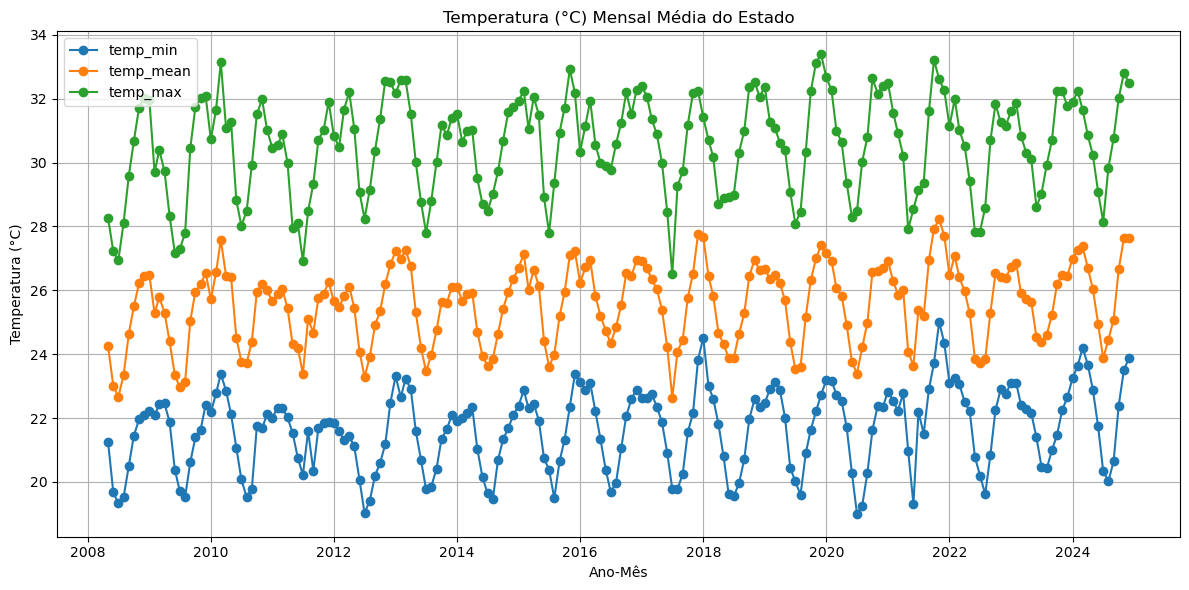

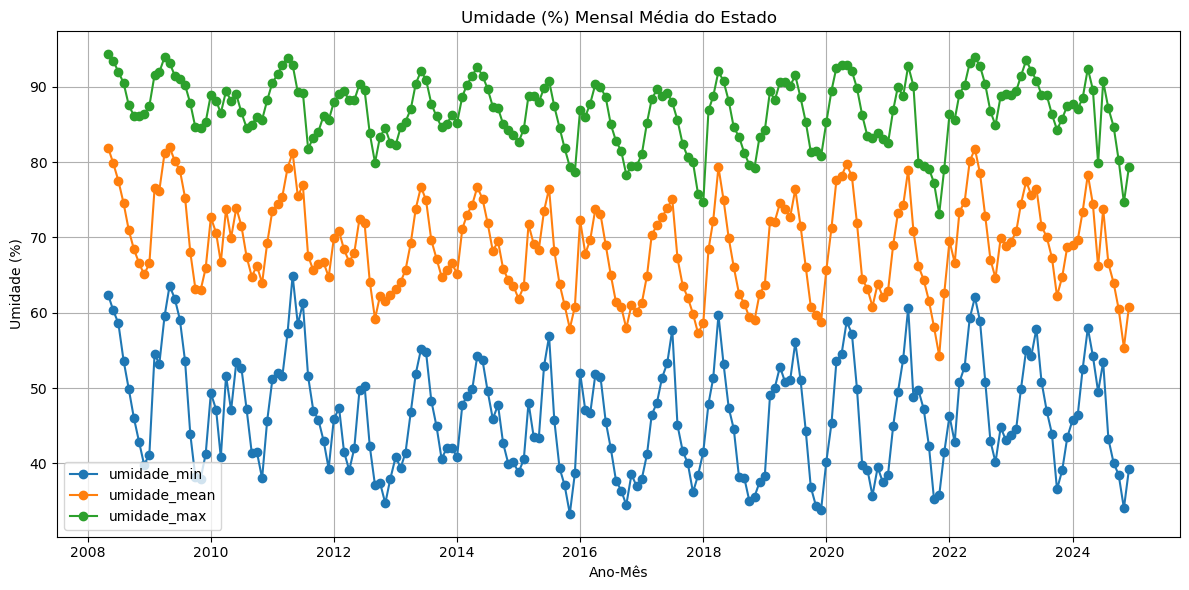

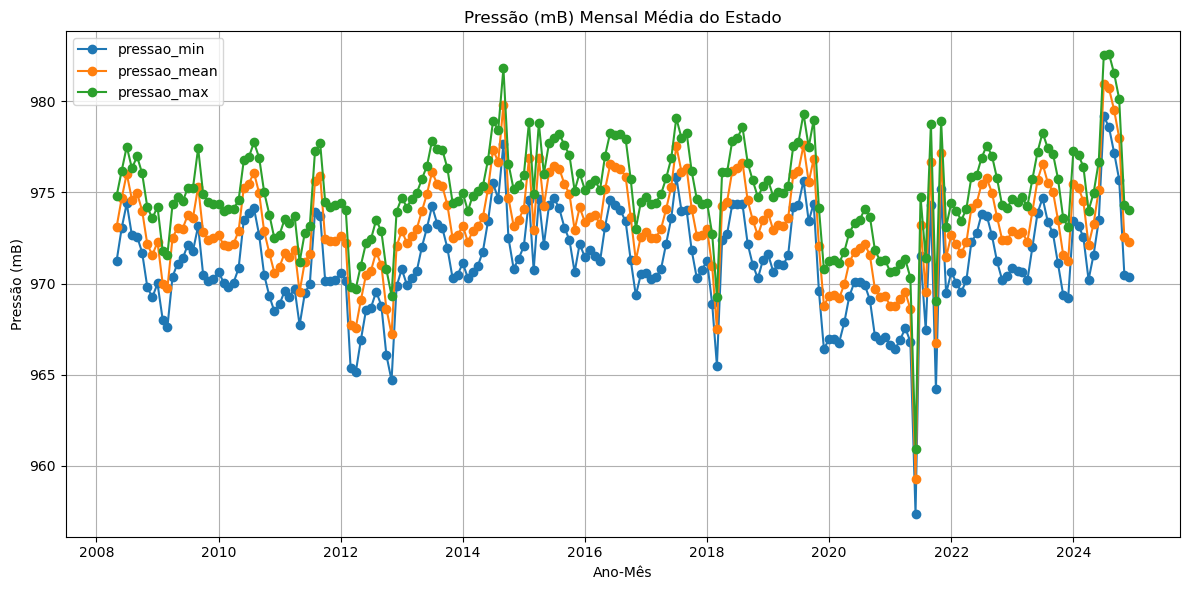

In [38]:
import matplotlib.pyplot as plt

variaveis = {
    'Temperatura (¬∞C)': ['temp_min', 'temp_mean', 'temp_max'],
    'Umidade (%)': ['umidade_min', 'umidade_mean', 'umidade_max'],
    'Press√£o (mB)': ['pressao_min', 'pressao_mean', 'pressao_max']
}

for nome, colunas in variaveis.items():
    plt.figure(figsize=(12,6))
    for col in colunas:
        plt.plot(media_mensal_estado['ano_mes'], media_mensal_estado[col], marker='o', label=col)
    
    plt.title(f'{nome} Mensal M√©dia do Estado')
    plt.xlabel('Ano-M√™s')
    plt.ylabel(nome)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [39]:
media_mensal_estado.to_csv('media_mensal_estado.csv', index=False, encoding='utf-8')


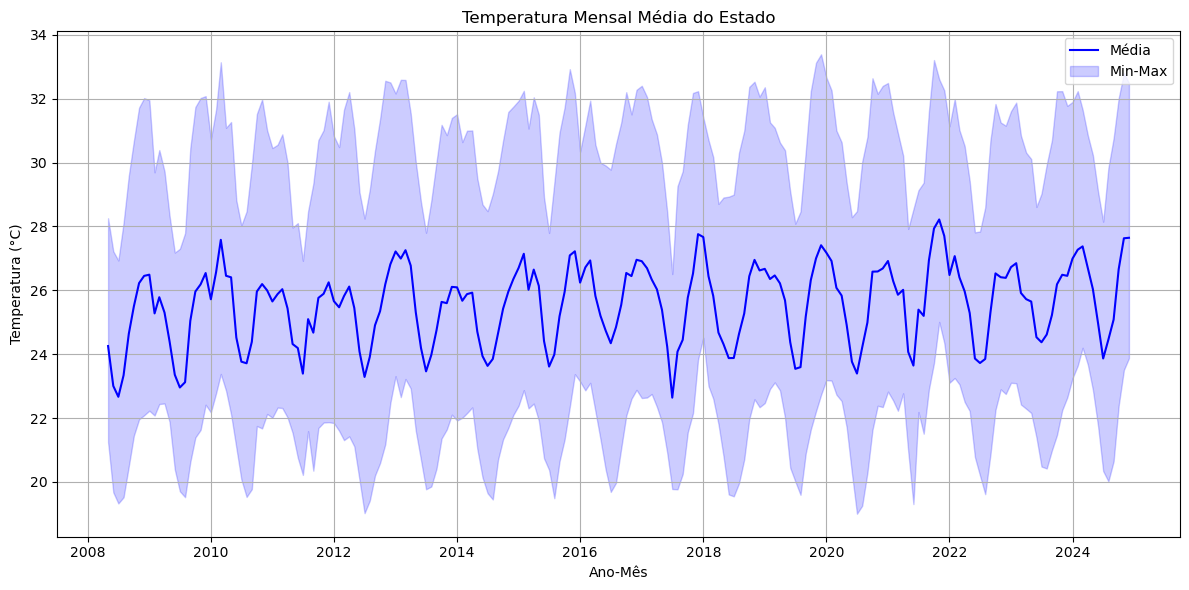

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot linha da m√©dia
plt.plot(media_mensal_estado['ano_mes'], media_mensal_estado['temp_mean'], color='blue', label='M√©dia')

# Sombreia entre min e max
plt.fill_between(
    media_mensal_estado['ano_mes'],
    media_mensal_estado['temp_min'],
    media_mensal_estado['temp_max'],
    color='blue',
    alpha=0.2,
    label='Min-Max'
)

plt.title('Temperatura Mensal M√©dia do Estado')
plt.xlabel('Ano-M√™s')
plt.ylabel('Temperatura (¬∞C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


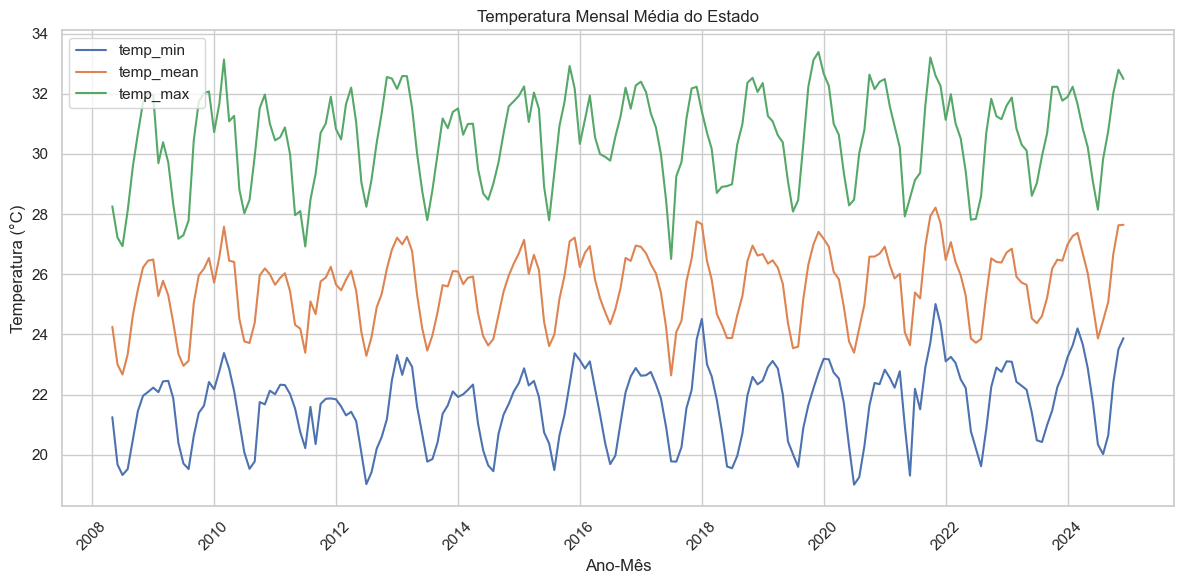

In [41]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

for col in ['temp_min', 'temp_mean', 'temp_max']:
    sns.lineplot(x='ano_mes', y=col, data=media_mensal_estado, label=col)

plt.title('Temperatura Mensal M√©dia do Estado')
plt.xlabel('Ano-M√™s')
plt.ylabel('Temperatura (¬∞C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


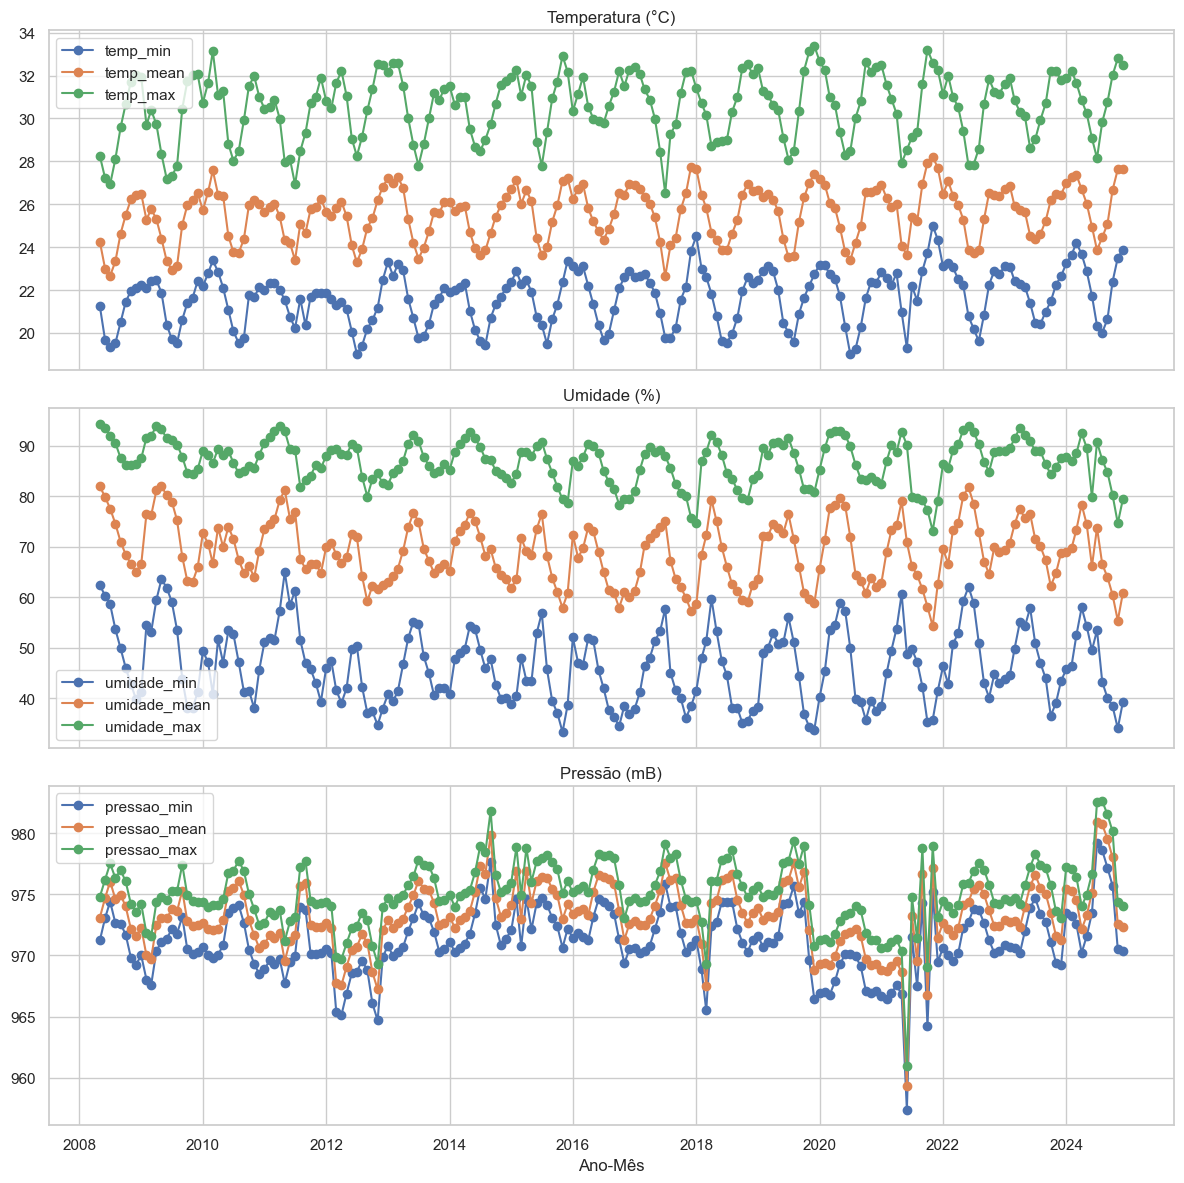

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(12,12), sharex=True)

variaveis = {
    'Temperatura (¬∞C)': ['temp_min', 'temp_mean', 'temp_max'],
    'Umidade (%)': ['umidade_min', 'umidade_mean', 'umidade_max'],
    'Press√£o (mB)': ['pressao_min', 'pressao_mean', 'pressao_max']
}

for ax, (nome, colunas) in zip(axes, variaveis.items()):
    for col in colunas:
        ax.plot(media_mensal_estado['ano_mes'], media_mensal_estado[col], marker='o', label=col)
    ax.set_title(nome)
    ax.grid(True)
    ax.legend()

plt.xlabel('Ano-M√™s')
plt.tight_layout()
plt.show()


# PyMan-Kendall

In [44]:
!pip install pymannkendall

In [45]:
import pymannkendall as mk
import pandas as pd

variaveis = ['temp_min', 'temp_max', 'temp_mean',
             'umidade_min', 'umidade_max', 'umidade_mean',
             'pressao_min', 'pressao_max', 'pressao_mean']

# Dicion√°rio para armazenar resultados
tendencias = {}

for var in variaveis:
    resultados = {}
    
    # Original test
    res_orig = mk.original_test(media_mensal_estado[var])
    resultados['original_trend'] = res_orig.trend
    resultados['original_p'] = res_orig.p
    resultados['original_slope'] = res_orig.slope
    
    # Hamed-Rao modification
    res_hamed = mk.hamed_rao_modification_test(media_mensal_estado[var])
    resultados['hamed_trend'] = res_hamed.trend
    resultados['hamed_p'] = res_hamed.p
    resultados['hamed_slope'] = res_hamed.slope
    
    # Yue-Wang modification
    res_yue = mk.yue_wang_modification_test(media_mensal_estado[var])
    resultados['yue_trend'] = res_yue.trend
    resultados['yue_p'] = res_yue.p
    resultados['yue_slope'] = res_yue.slope
    
    tendencias[var] = resultados

# Transformar em DataFrame
tendencias_df = pd.DataFrame(tendencias).T
print(tendencias_df)


             original_trend original_p original_slope hamed_trend   hamed_p  \
temp_min         increasing   0.000169       0.005513  increasing       0.0   
temp_max         increasing   0.018711       0.004308  increasing  0.023562   
temp_mean        increasing   0.001321       0.004843  increasing  0.000272   
umidade_min        no trend   0.120579      -0.014656    no trend  0.201037   
umidade_max        no trend   0.063808      -0.010102    no trend  0.174285   
umidade_mean       no trend    0.06396      -0.015575    no trend  0.155166   
pressao_min        no trend   0.150372       0.003961    no trend   0.34995   
pressao_max        no trend   0.208184       0.003656    no trend   0.45213   
pressao_mean       no trend   0.186175       0.003728    no trend  0.400385   

             hamed_slope   yue_trend     yue_p yue_slope  
temp_min        0.005513  increasing       0.0  0.005513  
temp_max        0.004308  increasing       0.0  0.004308  
temp_mean       0.004843  increa

C:\Users\gugui\AppData\Local\Temp\ipykernel_16480\22091135.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tendencias_df_format = tendencias_df.applymap(lambda x: f"{x:.6f}" if isinstance(x, (int, float)) else str(x))


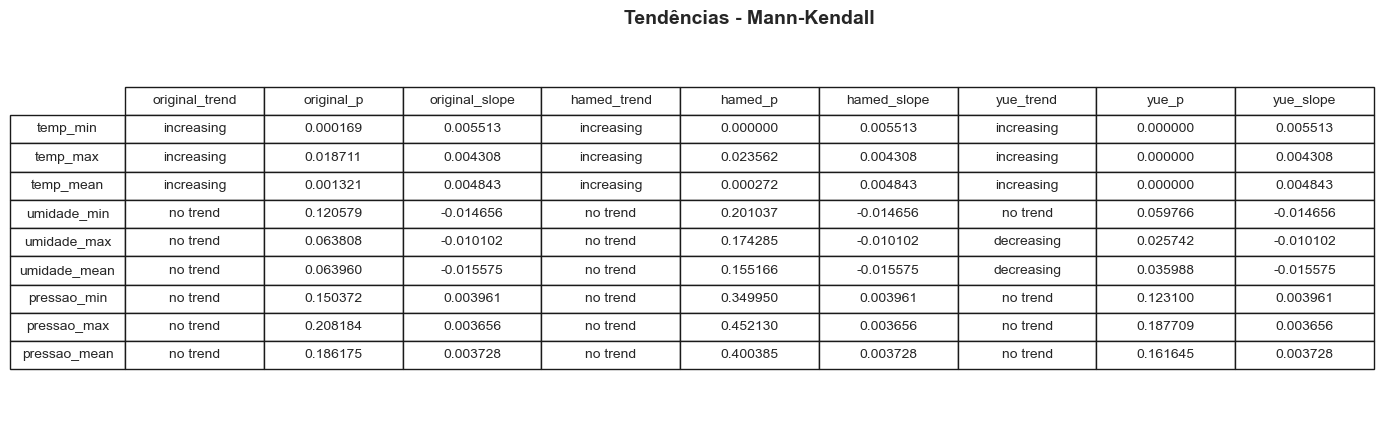

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que voc√™ j√° tenha o DataFrame 'tendencias_df'

# Formata todos os valores para 6 casas decimais como string
tendencias_df_format = tendencias_df.applymap(lambda x: f"{x:.6f}" if isinstance(x, (int, float)) else str(x))

# Cria figura
fig, ax = plt.subplots(figsize=(14, len(tendencias_df_format)*0.5))
ax.axis('off')

# Adiciona a tabela
tbl = ax.table(
    cellText=tendencias_df_format.values,
    colLabels=tendencias_df_format.columns,
    rowLabels=tendencias_df_format.index,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

# Adiciona t√≠tulo
plt.title("Tend√™ncias - Mann-Kendall", fontsize=14, weight='bold')

# Salva a imagem
plt.tight_layout()
plt.savefig("plots/tendencias_df.png", dpi=300)
plt.show()


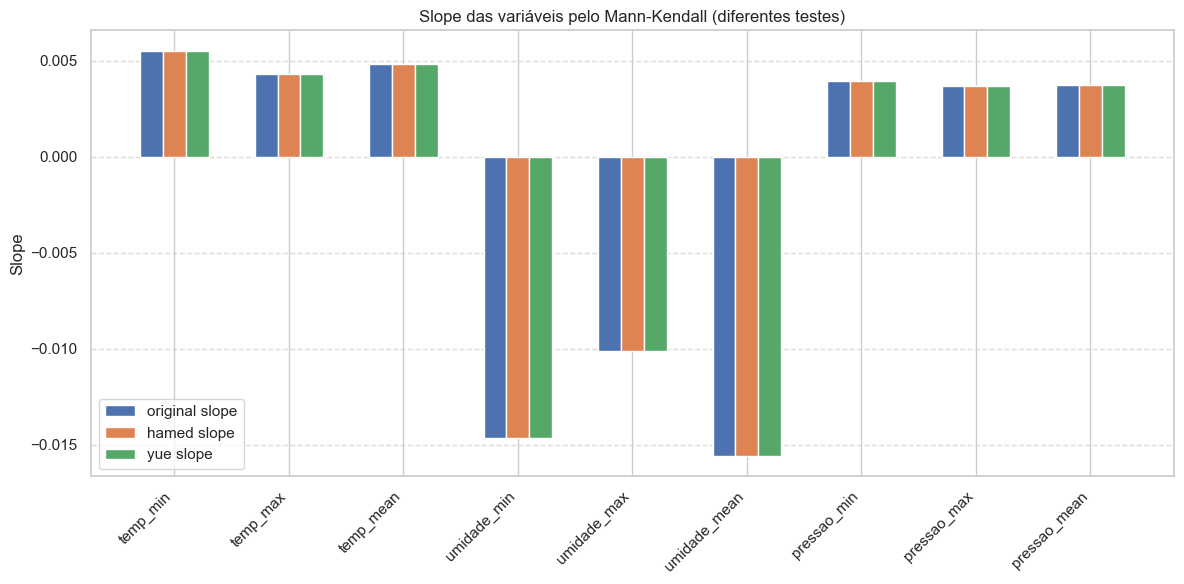

In [47]:
import matplotlib.pyplot as plt

# Separar testes
testes = ['original', 'hamed', 'yue']

# Configura√ß√£o do gr√°fico
fig, ax = plt.subplots(figsize=(12,6))

largura = 0.2  # largura das barras
x = range(len(variaveis))

for i, teste in enumerate(testes):
    slopes = tendencias_df[f"{teste}_slope"]
    ax.bar([p + i*largura for p in x], slopes, width=largura, label=f"{teste} slope")

# Configura√ß√µes do eixo x
ax.set_xticks([p + largura for p in x])
ax.set_xticklabels(variaveis, rotation=45, ha='right')

# R√≥tulos e t√≠tulo
ax.set_ylabel("Slope")
ax.set_title("Slope das vari√°veis pelo Mann-Kendall (diferentes testes)")
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


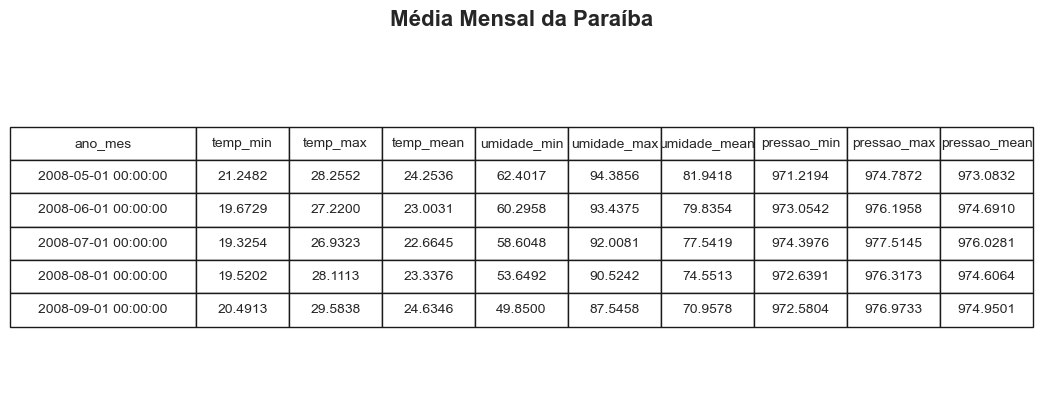

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = media_mensal_estado
df_head = df.head()

# Formata todas as colunas num√©ricas para 4 casas decimais
df_head_formatted = df_head.copy()
for col in df_head_formatted.select_dtypes(include='number').columns:
    df_head_formatted[col] = df_head_formatted[col].map(lambda x: f"{x:.4f}")

# Ajusta tamanho da figura
fig_width = max(12, len(df_head_formatted.columns) * 1.2)
fig_height = 2 + 0.5 * len(df_head_formatted)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.axis('off')

# Adiciona t√≠tulo
plt.title("M√©dia Mensal da Para√≠ba", fontsize=16, weight='bold', pad=20)

# Cria tabela
tbl = ax.table(
    cellText=df_head_formatted.values,
    colLabels=df_head_formatted.columns,
    cellLoc='center',
    loc='center'
)

# Ajusta tamanho da fonte
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

# Escala altura das linhas e largura das colunas
tbl.scale(1.2, 2)  # largura x altura

# Deixa a primeira coluna maior
for key, cell in tbl.get_celld().items():
    if key[1] == 0:  # coluna 0 (primeira)
        cell.set_width(0.2)  # mais larga
    else:
        cell.set_width(0.1)

# Salva como PNG
plt.savefig("plots/df_head.png", bbox_inches='tight', dpi=150)
plt.show()


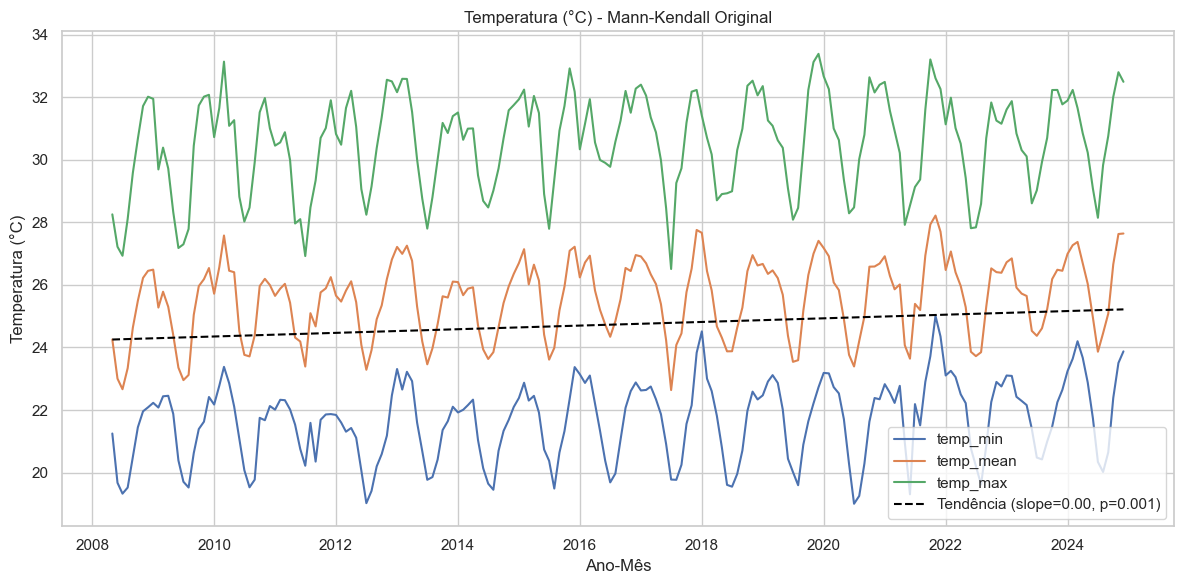

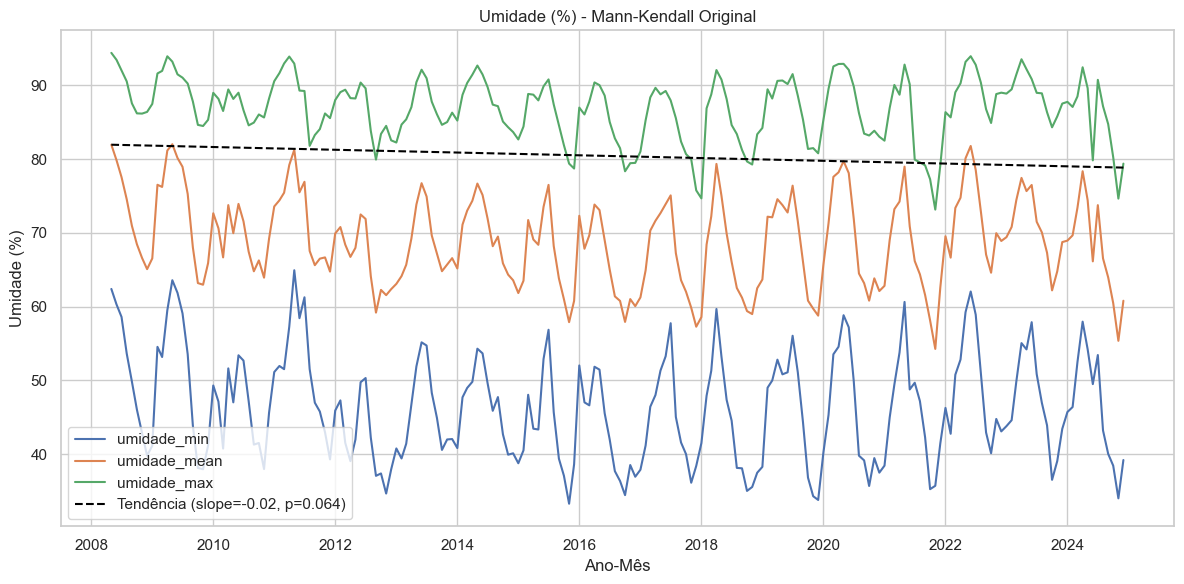

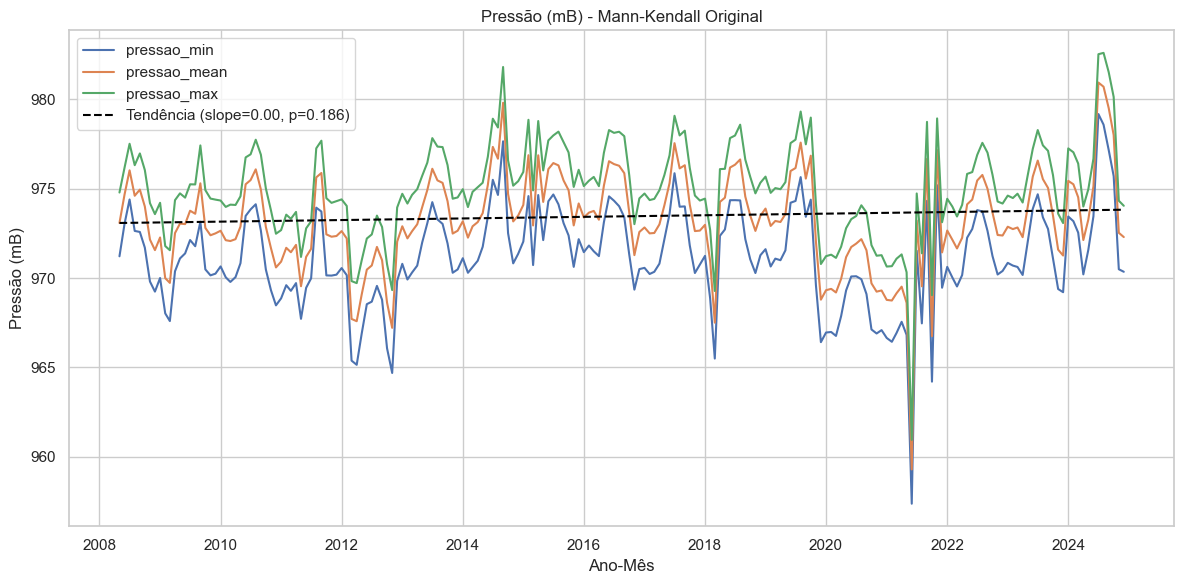

In [49]:
import matplotlib.pyplot as plt
import pymannkendall as mk

# Fun√ß√£o para plotar uma vari√°vel com min, mean, max
def plot_variavel_trend(df, prefixo, titulo):
    colunas = [f"{prefixo}_min", f"{prefixo}_mean", f"{prefixo}_max"]
    
    plt.figure(figsize=(12, 6))
    
    for col in colunas:
        plt.plot(df['ano_mes'], df[col], label=col)
    
    # Calcula Mann-Kendall original para a m√©dia
    res = mk.original_test(df[f"{prefixo}_mean"])
    
    # Plota linha de tend√™ncia da m√©dia
    slope = res.slope
    intercept = df[f"{prefixo}_mean"].iloc[0] - slope * 0  # assume x=0 no primeiro ponto
    plt.plot(df['ano_mes'], df[f"{prefixo}_mean"].iloc[0] + slope * range(len(df)), 
             color='black', linestyle='--', label=f"Tend√™ncia (slope={slope:.2f}, p={res.p:.3f})")
    
    plt.title(f"{titulo} - Mann-Kendall Original")
    plt.xlabel("Ano-M√™s")
    plt.ylabel(titulo)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotar cada vari√°vel
plot_variavel_trend(media_mensal_estado, 'temp', 'Temperatura (¬∞C)')
plot_variavel_trend(media_mensal_estado, 'umidade', 'Umidade (%)')
plot_variavel_trend(media_mensal_estado, 'pressao', 'Press√£o (mB)')


In [50]:
import matplotlib.pyplot as plt
import pymannkendall as mk
import numpy as np
import os

# Fun√ß√£o para plotar vari√°vel com min, mean, max e tend√™ncias + pontos inicial e final
def plot_variavel_trend(df, prefixo, titulo, pasta_saida="plots"):
    colunas = [f"{prefixo}_min", f"{prefixo}_mean", f"{prefixo}_max"]
    cores = ['blue', 'green', 'red']  # cores para min, mean, max
    
    # Garante que a pasta de sa√≠da exista
    os.makedirs(pasta_saida, exist_ok=True)
    
    # Cria figura em 1080p
    plt.figure(figsize=(12, 6), dpi=180)
    
    for col, cor in zip(colunas, cores):
        serie = df[col].dropna().reset_index(drop=True)
        x = np.arange(len(serie))
        
        res = mk.original_test(serie)
        slope = res.slope
        y0 = serie.iloc[0]
        tendencia = y0 + slope * x
        
        plt.plot(df['ano_mes'], df[col], label=col, color=cor, linewidth=1.8)
        plt.plot(df['ano_mes'], tendencia, linestyle='--', color=cor, linewidth=2,
                 label=f"Tend√™ncia {col} (slope={slope:.3f}, p={res.p:.3f})")
        
        # Ponto inicial
        plt.scatter(df['ano_mes'].iloc[0], tendencia[0],
                    color=cor, edgecolor='black', s=80, zorder=5)
        plt.text(df['ano_mes'].iloc[0], tendencia[0],
                 f"{tendencia[0]:.2f}", color=cor, fontsize=9,
                 ha='right', va='bottom', weight='bold')
        
        # Ponto final
        plt.scatter(df['ano_mes'].iloc[-1], tendencia[-1],
                    color=cor, edgecolor='black', s=80, zorder=5)
        plt.text(df['ano_mes'].iloc[-1], tendencia[-1],
                 f"{tendencia[-1]:.2f}", color=cor, fontsize=9,
                 ha='left', va='bottom', weight='bold')
    
    plt.title(f"{titulo} - Tend√™ncia Mann-Kendall", fontsize=14, weight='bold')
    plt.xlabel("Ano-M√™s")
    plt.ylabel(titulo)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Caminho do arquivo de sa√≠da
    nome_arquivo = f"{prefixo}_trend.png"
    caminho = os.path.join(pasta_saida, nome_arquivo)
    
    # Salva em 1080p (alta qualidade)
    plt.savefig(caminho, dpi=180, bbox_inches='tight')
    plt.close()
    print(f"‚úÖ Gr√°fico salvo: {caminho}")

# Gerar e salvar cada gr√°fico
plot_variavel_trend(media_mensal_estado, 'temp', 'Temperatura (¬∞C)')
plot_variavel_trend(media_mensal_estado, 'umidade', 'Umidade (%)')
plot_variavel_trend(media_mensal_estado, 'pressao', 'Press√£o (mB)')


‚úÖ Gr√°fico salvo: plots\temp_trend.png
‚úÖ Gr√°fico salvo: plots\umidade_trend.png
‚úÖ Gr√°fico salvo: plots\pressao_trend.png


Sim! No matplotlib (e consequentemente no seaborn, que √© baseado nele) voc√™ consegue salvar gr√°ficos em PNG com resolu√ß√£o customizada usando o par√¢metro dpi na fun√ß√£o savefig().

üîπ Exemplo b√°sico
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Exemplo de dados
data = pd.DataFrame({
    'cidade': ['Campina', 'Patos', 'Cabaceiras', 'Monteiro'],
    'temp_mean': [25.3, 26.1, 24.8, 25.7],
    'umidade_mean': [70, 65, 72, 68]
})

# Plot usando seaborn
plt.figure(figsize=(10,6))  # tamanho da figura em polegadas
sns.barplot(x='cidade', y='temp_mean', data=data)
plt.title("Temperatura m√©dia")

# Salvar em PNG
plt.savefig("temperatura_media.png", dpi=1080)  # dpi alto para alta resolu√ß√£o
plt.show()

             Local      Vari√°vel       Tau             p   Tend√™ncia  \
0   Campina Grande     temp_mean  0.031521  9.703588e-02    no trend   
1   Campina Grande  umidade_mean  0.228785  1.504796e-12  increasing   
2   Campina Grande  pressao_mean  0.112850  2.352281e-05  increasing   
3            Patos     temp_mean  0.192899  1.399547e-12  increasing   
4            Patos  umidade_mean -0.064227  3.620476e-01    no trend   
5            Patos  pressao_mean  0.103156  2.498005e-07  increasing   
6       Cabaceiras     temp_mean  0.109564  7.046166e-10  increasing   
7       Cabaceiras  umidade_mean -0.101252  4.389612e-04  decreasing   
8       Cabaceiras  pressao_mean  0.064335  5.215099e-02    no trend   
9       Camaratuba     temp_mean  0.051037  1.403712e-02  increasing   
10      Camaratuba  umidade_mean  0.117740  2.508101e-02  increasing   
11      Camaratuba  pressao_mean  0.098797  8.336437e-04  increasing   
12     Jo√£o Pessoa     temp_mean  0.157875  0.000000e+00  inc

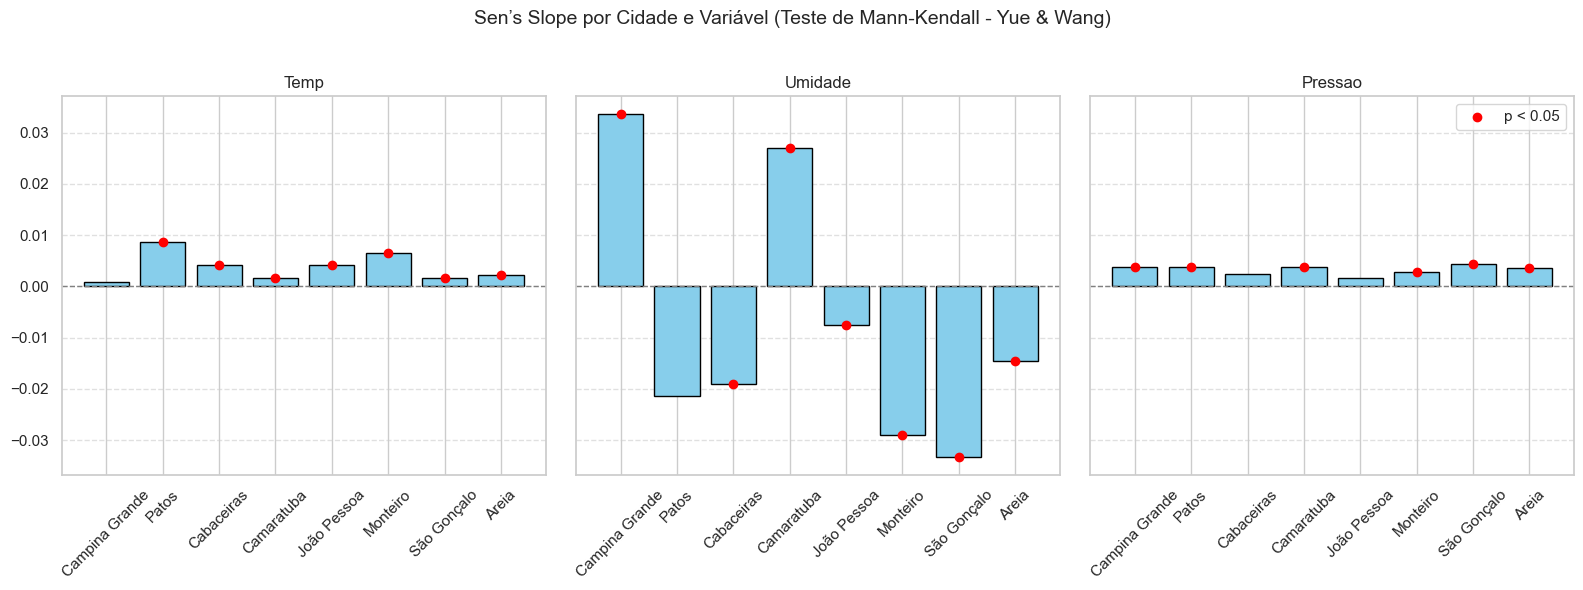

In [52]:
import pymannkendall as mk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Lista dos dataframes e nomes correspondentes
dfs = [
    ("Campina Grande", campina_media_mensal),
    ("Patos", patos_media_mensal),
    ("Cabaceiras", cabaceiras_media_mensal),
    ("Camaratuba", camaratuba_media_mensal),
    ("Jo√£o Pessoa", jampa_media_mensal),
    ("Monteiro", monteiro_media_mensal),
    ("S√£o Gon√ßalo", sao_goncalo_media_mensal),
    ("Areia", areia_media_mensal),
]

# Vari√°veis para an√°lise
variaveis = ["temp_mean", "umidade_mean", "pressao_mean"]

# Fun√ß√£o segura para aplicar Mann-Kendall
def aplicar_testes(serie):
    serie = serie.dropna()
    if len(serie) < 3 or serie.nunique() <= 1:
        return None  # sem dados suficientes
    try:
        return mk.yue_wang_modification_test(serie)
    except Exception:
        return None

# Lista de resultados
resultados = []

for nome_local, df in dfs:
    for var in variaveis:
        if var not in df.columns:
            continue
        teste = aplicar_testes(df[var])
        if teste is not None:
            resultados.append({
                "Local": nome_local,
                "Vari√°vel": var,
                "Tau": teste.Tau,
                "p": teste.p,
                "Tend√™ncia": teste.trend,
                "Sen‚Äôs slope": teste.slope
            })

# Cria DataFrame consolidado
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# --------------------------------
# üìä Gr√°fico de barras por vari√°vel
# --------------------------------
fig, axs = plt.subplots(1, len(variaveis), figsize=(16, 6), sharey=True)

for i, var in enumerate(variaveis):
    subset = df_resultados[df_resultados["Vari√°vel"] == var]
    
    axs[i].bar(subset["Local"], subset["Sen‚Äôs slope"], color='skyblue', edgecolor='black')
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=1)
    
    # Linha vermelha: limite de signific√¢ncia (p < 0.05)
    significativos = subset[subset["p"] < 0.05]
    axs[i].scatter(significativos["Local"], significativos["Sen‚Äôs slope"], 
                   color='red', zorder=5, label='p < 0.05')
    
    axs[i].set_title(var.replace('_mean', '').capitalize())
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.6)

fig.suptitle("Sen‚Äôs Slope por Cidade e Vari√°vel (Teste de Mann-Kendall - Yue & Wang)", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.show()


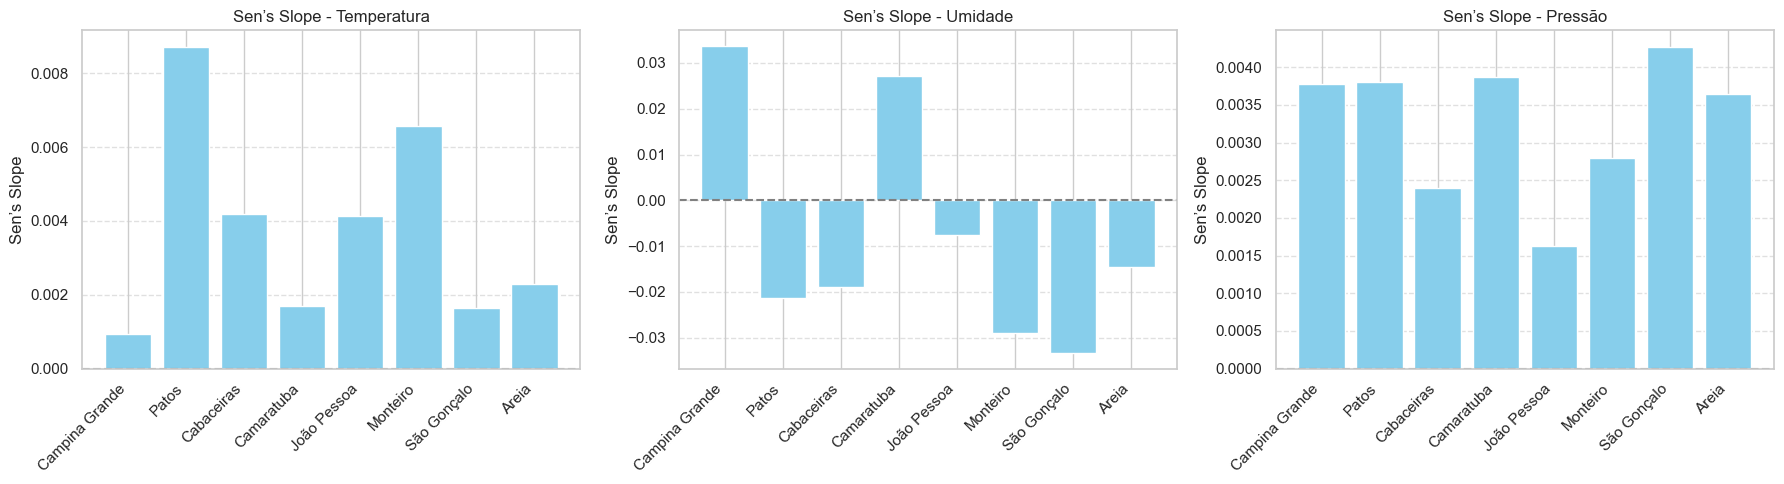

In [53]:
import matplotlib.pyplot as plt

variaveis = ["temp_mean", "umidade_mean", "pressao_mean"]
nomes_variaveis = ["Temperatura", "Umidade", "Press√£o"]

fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=False)

for i, var in enumerate(variaveis):
    subset = df_resultados[df_resultados["Vari√°vel"] == var]
    axs[i].bar(subset["Local"], subset["Sen‚Äôs slope"], color='skyblue')
    axs[i].axhline(0, color='gray', linestyle='--')
    axs[i].set_title(f"Sen‚Äôs Slope - {nomes_variaveis[i]}")
    axs[i].set_ylabel("Sen‚Äôs Slope")
    
    # Corrige o warning definindo os ticks explicitamente
    axs[i].set_xticks(range(len(subset["Local"])))
    axs[i].set_xticklabels(subset["Local"], rotation=45, ha='right')
    
    axs[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


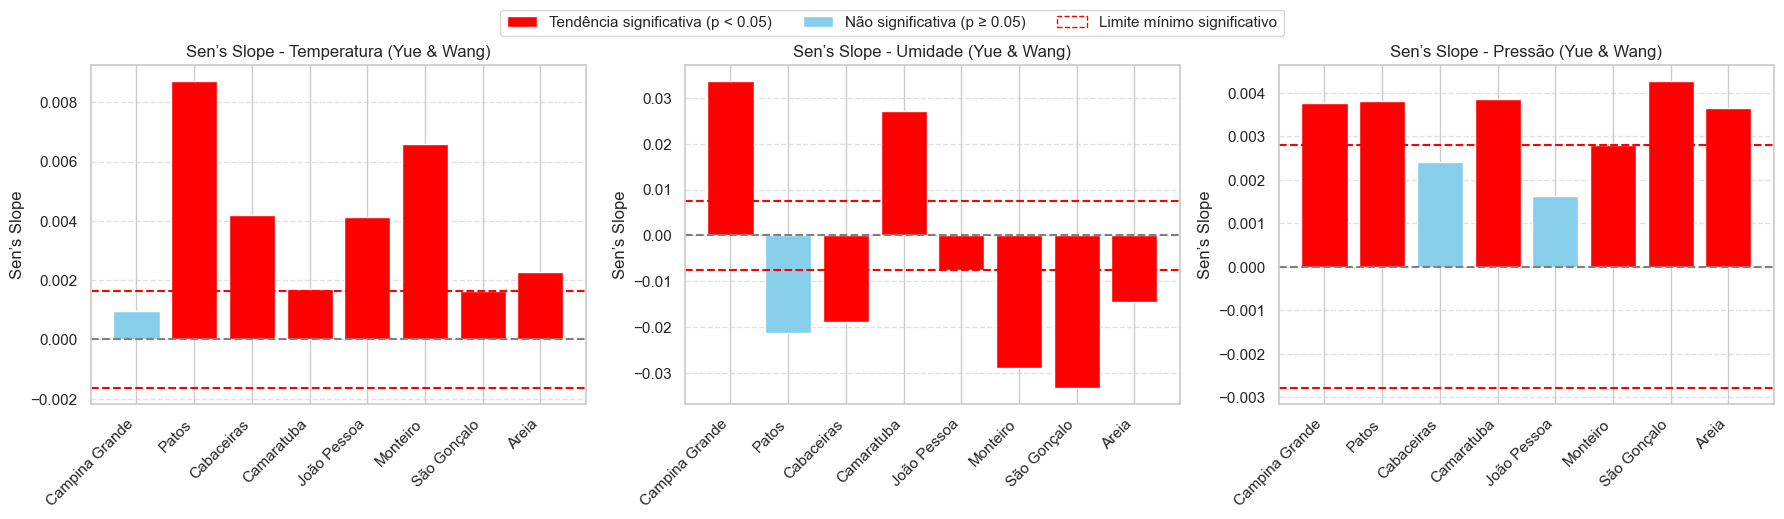

In [54]:
import matplotlib.pyplot as plt

variaveis = ["temp_mean", "umidade_mean", "pressao_mean"]
nomes_variaveis = ["Temperatura", "Umidade", "Press√£o"]

fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=False)

for i, var in enumerate(variaveis):
    subset = df_resultados[df_resultados["Vari√°vel"] == var].copy()
    
    # Cor das barras: vermelho se p < 0.05 (Yue), azul caso contr√°rio
    cores = ['red' if p < 0.05 else 'skyblue' for p in subset['p']]
    
    # Cria as barras
    axs[i].bar(subset["Local"], subset["Sen‚Äôs slope"], color=cores)
    axs[i].axhline(0, color='gray', linestyle='--')
    
    # Linha indicando valor m√≠nimo de Sen's Slope significativo
    signif_slopes = subset.loc[subset['p'] < 0.05, "Sen‚Äôs slope"]
    if not signif_slopes.empty:
        min_signif = signif_slopes.abs().min()
        axs[i].axhline(min_signif, color='red', linestyle='--', linewidth=1.5)
        axs[i].axhline(-min_signif, color='red', linestyle='--', linewidth=1.5)
    
    # T√≠tulos e r√≥tulos
    axs[i].set_title(f"Sen‚Äôs Slope - {nomes_variaveis[i]} (Yue & Wang)")
    axs[i].set_ylabel("Sen‚Äôs Slope")
    axs[i].set_xticks(range(len(subset["Local"])))
    axs[i].set_xticklabels(subset["Local"], rotation=45, ha='right')
    axs[i].grid(axis='y', linestyle='--', alpha=0.6)

# Legenda explicativa
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Tend√™ncia significativa (p < 0.05)'),
                   Patch(facecolor='skyblue', label='N√£o significativa (p ‚â• 0.05)'),
                   Patch(facecolor='none', edgecolor='red', linestyle='--', label='Limite m√≠nimo significativo')]
fig.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
# Salvar em 1080p (1920x1080 pixels)
fig.savefig("plots/sen_slope.png", dpi=300)  # ajusta dpi conforme necess√°rio
plt.show()


In [55]:
plt.figure(figsize=(12,6))

# Posi√ß√£o para cada grupo de barras
x = range(len(df_resultados))

plt.bar([i - 0.25 for i in x], df_resultados["Tau (Original)"], width=0.25, label="Original")
plt.bar(x, df_resultados["Tau (Rao)"], width=0.25, label="Rao")
plt.bar([i + 0.25 for i in x], df_resultados["Tau (Yue)"], width=0.25, label="Yue")

plt.xticks(x, df_resultados["Local"], rotation=45)
plt.ylabel("Tau de Kendall")
plt.title("Compara√ß√£o do teste de Mann-Kendall entre localidades")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


KeyError: 'Tau (Original)'

<Figure size 1200x600 with 0 Axes>